### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<Axes: title={'center': 'Null Value Count'}>

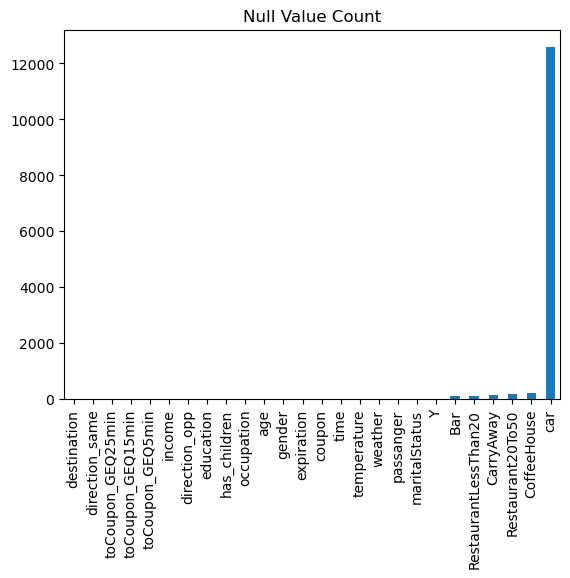

In [4]:
data.isna().sum().sort_values().plot(kind='bar', title='Null Value Count')

The column 'car' seems to have null values in almost all of its users listed.
What does the column 'car' mean though? 
Let's see what does the non-null values look like.

In [5]:
data[~data['car'].isna()]['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

According to the data's context, I would presume that this represents the vehicle that the user is currently using when he/she received the coupon as he/she is heading towards his/her destination.

The bar-chart also shows that the columns 'Bar', 'RestaurantLessThan20', 'CarryAway', Restaurant20To50', and 'CoffeeHouse' have very few null-values.

3. (1) Decide what to do about your missing data -- drop, replace, other...

Since the column 'car' mostly has null-values, I would say that this column is unreliable. Thus, as part of the data cleaning, I would drop this column.
As for the other columns that also have null-values, since they have very little null-values, I would keep these columns and just get rid of users that have null-values on any of these columns since cleaning away a few users wouldn't impact the data that much.

In [6]:
data_clean = data.drop(columns=['car'])
data_clean.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

<Axes: title={'center': 'Null Value Count After Data Cleaning'}>

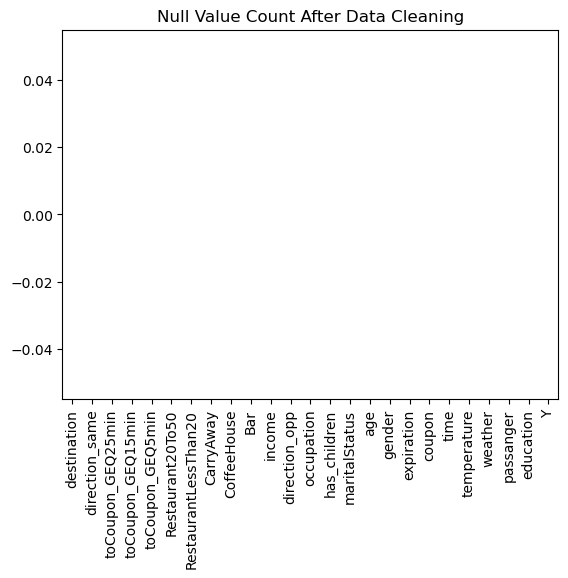

In [7]:
data_clean = data_clean.dropna()
data_clean.isna().sum().sort_values().plot(kind='bar', title='Null Value Count After Data Cleaning')

In [8]:
data.shape[0] - data_clean.shape[0]

605

In [9]:
data_clean.shape[0]

12079

After cleaning, only 605 users were removed, and there are still over 12k users left. Thus, I believe the cleaned data is still sufficiently reliable and accurate.

3. (2) Additional Corrections/Modifications

In [10]:
data_clean.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

I've noticed that the column "passanger" is spelled incorrectly. Thus, I will rename it correctly.

In [11]:
data_clean = data_clean.rename(columns={'passanger':'passenger'})
data_clean.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

I will check on the datatypes in the dataset to see if there are any types I should change for the sake of better data splitting or comparing.

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

'time' column catches my attention because its type is an object but may be a good idea to change it into an integer type.

In [13]:
data_clean['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

For the sake of easier data splitting/comparing, I will change the column 'time' into an integer 24-Hour Clock Time. I will also rename the 'time' column into 'time_hour_24' for better clarification.

In [14]:
def clock(time):
    timeInt = None
    if (time.endswith('AM')) :
        timeInt = time.replace('AM','')
        timeInt = int(timeInt)
        if (timeInt == 12) :
            timeInt = 0
    elif (time.endswith('PM')) :
        timeInt = time.replace('PM','')
        timeInt = int(timeInt) + 12
    return timeInt

In [15]:
data_clean[['time']].head(10)

,time
22,2PM
23,10AM
24,10AM
25,10AM
26,2PM
27,2PM
28,2PM
29,2PM
30,6PM
31,6PM


In [16]:
data_clean['time'] = data_clean['time'].map(clock)

In [17]:
data_clean = data_clean.rename(columns={'time':'time_hour_24'})

In [18]:
data_clean[['time_hour_24']].head(10)

,time_hour_24
22,14
23,10
24,10
25,10
26,14
27,14
28,14
29,14
30,18
31,18


'age' column also catches my attention for the same reason.

In [19]:
data_clean['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

I will change the 'age' column to an integer column as well. For the 'below21', I will just change it into integer 20 and for the '50plus', I will change it into integer 50. I will keep in mind that 20 means users of age 20 or lower and 50 means users of age 50 or higher.

In [20]:
def ageInt(age):
    if ('below' in age):
        age = age.replace('below','')
        age = int(age) - 1
    elif ('plus' in age):
        age = age.replace('plus','')
    return int(age)

In [21]:
data_clean['age'] = data_clean['age'].map(ageInt)

In [22]:
data_clean['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12079 entries, 22 to 12683
Series name: age
Non-Null Count  Dtype
--------------  -----
12079 non-null  int64
dtypes: int64(1)
memory usage: 188.7 KB


4. What proportion of the total observations chose to accept the coupon? 



<Axes: title={'center': '(0 - Reject Coupon) (1 - Accept Coupon)'}, ylabel='Y'>

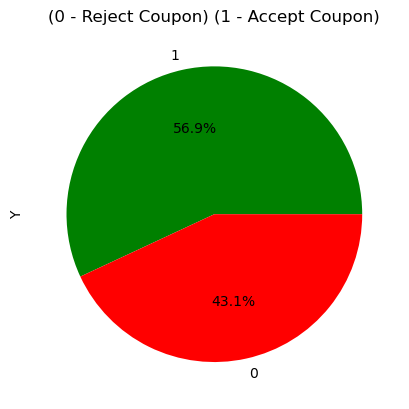

In [23]:
data_clean['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], title='(0 - Reject Coupon) (1 - Accept Coupon)')

According to the pie chart of the cleaned data, 56.9% chose to accept the coupon which is a little over a half of the users listed in the clean data.

5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 1.0, 'Coupon Frequency')]

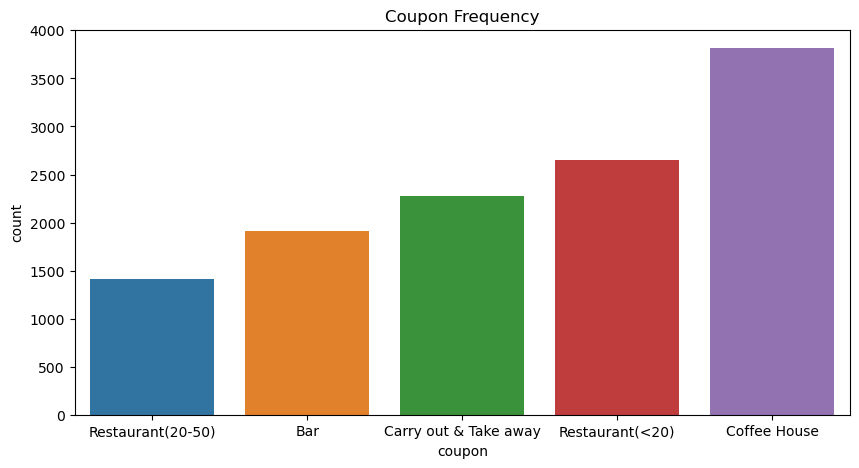

In [24]:
plt.figure(figsize = (10, 5))
sns.countplot(data_clean, x='coupon', 
              order=data_clean['coupon'].value_counts(ascending=True).index).set(title='Coupon Frequency')

Expensive Restaurant coupons ($20-50) are the least frequent coupons in the dataset,
and the Coffee House coupons are the most frequent coupons in the dataset.

6. Use a histogram to visualize the temperature column.

[Text(0.5, 1.0, 'Temperature Frequency')]

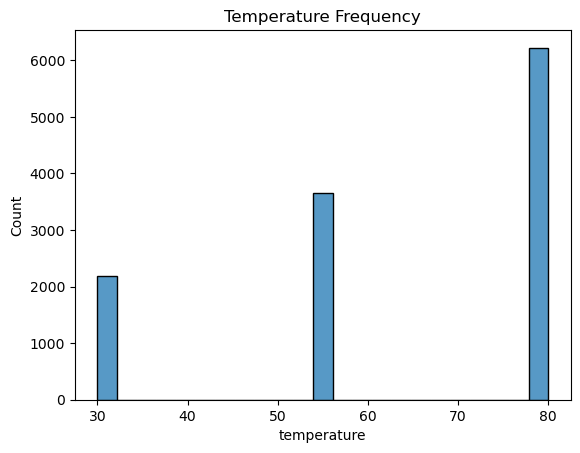

In [25]:
sns.histplot(data_clean['temperature']).set(title='Temperature Frequency')

Apparently, temperature 30F is least frequent, 55F is in between, and 80F is the most frequent.
Seems like there is a positive correlation between temperature and its frequency.

### Investigating the Coffee House Coupons

Finding the acceptance rate of users who have received a coupon for a coffeehouse.

In [26]:
coffee_coupon = data_clean.query('coupon == "Coffee House"')

In [27]:
coffee_coupon['coupon'].unique()

array(['Coffee House'], dtype=object)

<Axes: title={'center': 'Acceptance Rate of Coffee House Coupons'}, ylabel='Y'>

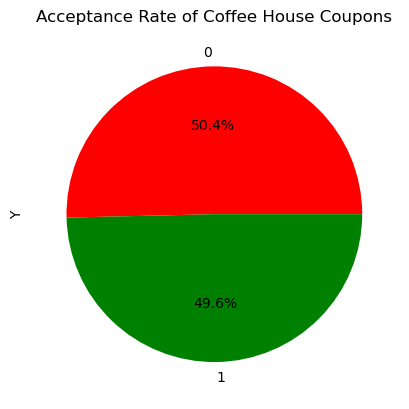

In [28]:
coffee_coupon['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['r', 'g'], title='Acceptance Rate of Coffee House Coupons')

Wow, this is the closest 50/50 acceptance rate I have ever seen. About half of the users who receive the coffee house coupon would like to use it while the other half don't.

I intuitively think that many people go to coffee house for caffeine so that they can have more energy to get through the day. Thus, I would think coffee is usually a morning beverage. Perhaps users will more likely accept the coffee house coupon during the morning.

Let's create a barplot that counts the proportion of users who accept the coupon or not throughout the 24-hour-time.

<Axes: title={'center': 'Coffee House Coupon'}, xlabel='time_hour_24'>

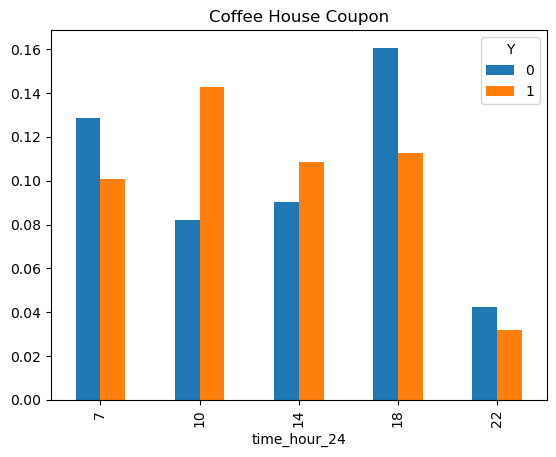

In [29]:
pd.crosstab(coffee_coupon['time_hour_24'],coffee_coupon.Y,normalize=True).plot(kind='bar',title='Coffee House Coupon')

According to the barplot, users at 10AM will more likely accept the coupon as expected since it is still morning at the time. I am rather surprised that users at 7AM would less likely accept the coupons.

Perhaps most of the users at 7AM happened to be still young at that specific time. I would intuitively think that perhaps older people would more likely drink coffee and thus more likely accept the coupon. 

Let's measure the proportion of age among users throughout the time.

<Axes: xlabel='time_hour_24'>

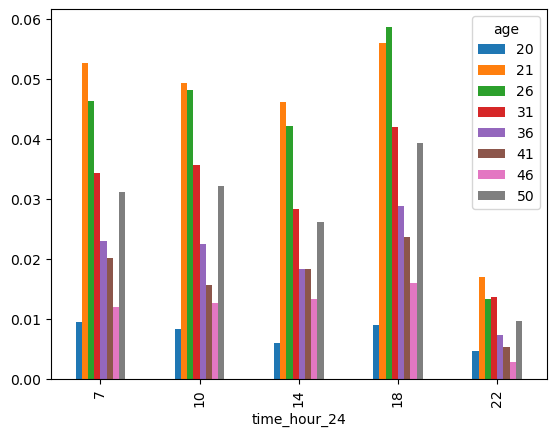

In [30]:
pd.crosstab(coffee_coupon['time_hour_24'],coffee_coupon.age,normalize=True).plot(kind='bar')

Throughout the 24-hour-time, most users are aged 21-26. Considering that we are talking about ages that have already reached adulthood and beyond along with the fact that age 21-26 is still pretty young and is common throughout all specified time, then perhaps age doesn't have to do much with accepting the coupon.

Let's see if users who monthly visit more coffee house would more likely accept the coupon.

I would want to capture the relationship between monthly visit coffee house and the coupon acceptance but instead of using a scatterplot which is not effective considering that data tend to overlap one another, I will use a heatmap instead since it might better capture its frequency.

<Axes: xlabel='CoffeeHouse', ylabel='Y'>

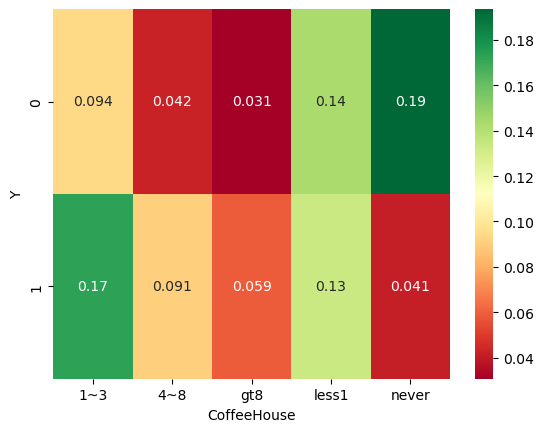

In [31]:
sns.heatmap(pd.crosstab(coffee_coupon.Y,coffee_coupon.CoffeeHouse,normalize=True),annot=True,cmap='RdYlGn')

I notice that there is a higher density at the Y=1 area than Y=0 area when users monthly visit the coffee house at least once.

Let's see if we will get a high acceptance rate of coffee house coupons if we look for users who monthly visit the coffee house at least once and are driving at 10AM.

In [32]:
more_than_once=['1~3','4~8','gt8']
more_than_once

['1~3', '4~8', 'gt8']

In [33]:
coffee_at_10 = coffee_coupon[coffee_coupon['time_hour_24'] == 10]
coffee_at_10 = coffee_at_10.query('CoffeeHouse in @more_than_once')

In [34]:
coffee_at_10['time_hour_24'].unique()

array([10], dtype=int64)

In [35]:
coffee_at_10['CoffeeHouse'].unique()

array(['4~8', '1~3', 'gt8'], dtype=object)

**Acceptance Rate of Coffee House Coupon (Monthly Coffee House Visit >= 1, Time = 10AM)**

<Axes: ylabel='Y'>

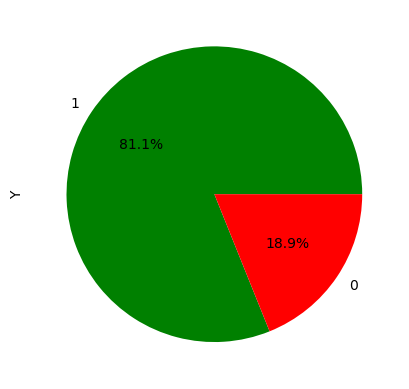

In [36]:
coffee_at_10['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'])

As confirmation, let's look at all other users and see if the acceptance rate for the Coffee House coupon decreases.

In [37]:
other__1 = coffee_coupon.query('time_hour_24 != 10 or CoffeeHouse not in @more_than_once')

In [38]:
other__1[['time_hour_24','CoffeeHouse']].sample(5)

,time_hour_24,CoffeeHouse
5258,7,less1
3016,18,never
6276,7,1~3
1550,14,less1
9525,18,less1


<Axes: title={'center': 'Others'}, ylabel='Y'>

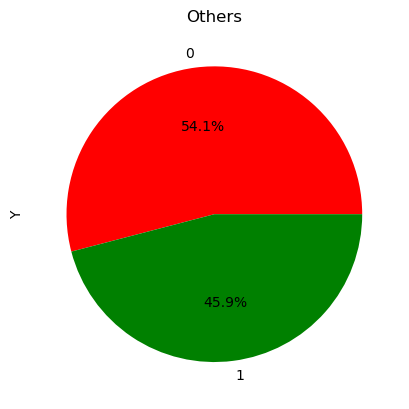

In [39]:
other__1['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['r', 'g'], title='Others')

Yes, the acceptance rate has indeed decrease even if it was just a little.

**Final Conclusion**

I can hypothesize that users who monthly visit the coffee house more than once will more likely accept the coupon for the Coffee House. If these said users are also driving at 10AM in addition, then they will most likely accept the coupon.

**Recommended Action**

You should obviously aim for users who monthly visit the Coffee House at least once if you are offering them a Coffee House coupon. In addition, I suggest you go for users who are driving at around 10AM as that may be the popular time for users to want some coffee for the morning. I do not think age matter in this case so feel free to offer the coupons to users, primarily adults or older, of any age as long as they fit the conditions I have set.